<a href="https://colab.research.google.com/github/sagar2582/TensorFlow/blob/main/02_Neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification with TensorFlow

## Creating data to view and fit


In [28]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [29]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [30]:
# labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [31]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


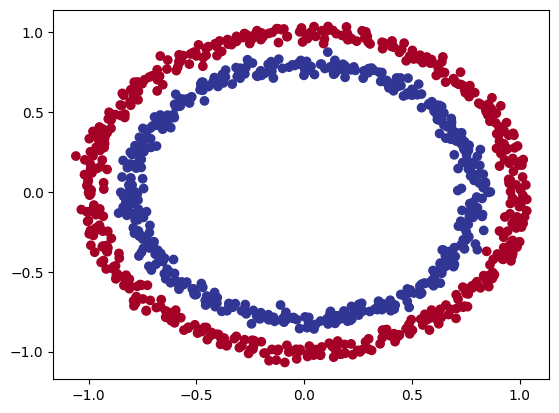

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [33]:
## Input and output shapes of our neural networks
X.shape, y.shape

((1000, 2), (1000,))

In [34]:
len(X), len(y)

(1000, 1000)

In [35]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [36]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# Create a model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.2921 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 6.2083 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.9963 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.7797 - accuracy: 0.4620
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2865 - accuracy: 0.4660


In [37]:
# improving our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)

In [38]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Adding an extra layer


In [39]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933537125587463, 0.5]

## Improving our model

In [40]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5160


[0.6965263485908508, 0.515999972820282]

### Let's create a function to visualize our model.

In [41]:
from numpy.core.fromnumeric import shape
import numpy as np

def plot_decision_boundry(model, X, y):
  '''
  Plots the decision boundary created by a model predicting on X.
  '''
  # Define the  axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
               
  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predcitions to get them ready for plotting 
    y_pred = np.argsmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


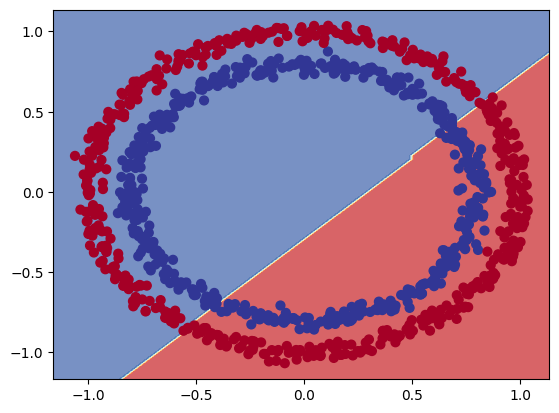

In [42]:
# Check out the predictions our model is making 
plot_decision_boundry(model=model_3,
                      X=X,
                      y=y)

In [43]:
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

## The missing piece : Non-linearity

In [44]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3305 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3257 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3248 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3238 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3232 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3223 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3216 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3209 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3201 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3192 - accuracy: 0.4840
Epoch 11/

In [45]:
# Time to replicate the multilayer neural network from TensorFlow playgrounds

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.4196 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 3.8693 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.5346 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3895 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 3.2108 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 2.0722 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9785 - accuracy: 0.4900
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9412 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9293 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9207 - accuracy: 0.4870
Epoch 11/

In [46]:
# Evaluate the model
model_5.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.5580


[0.6491242051124573, 0.5580000281333923]

313/313 [==============================] - 1s 3ms/step
doing binary classification


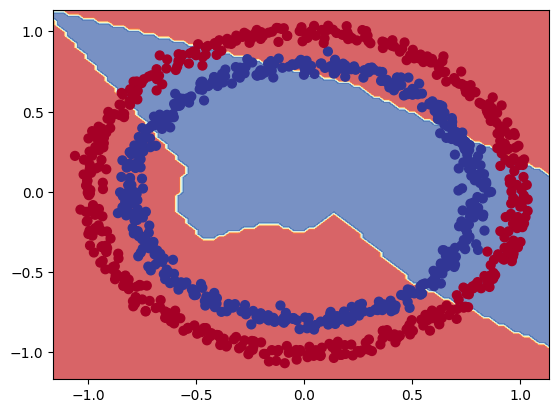

In [47]:
plot_decision_boundry(model_5, X, y)

In [54]:
# Changing/adding the activation in the output layer
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")      # Sigmoid for Binary Classification, softmax is used for multi-class classification
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5020
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5070
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5070
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5090
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5110
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5130
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5160
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5080
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5100
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


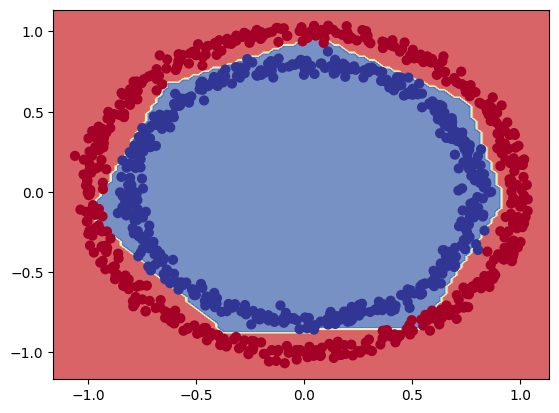

In [55]:
plot_decision_boundry(model_6, X, y)

In [56]:
model_6.evaluate(X, y)

32/32 [==============================] - 1s 4ms/step - loss: 0.1553 - accuracy: 0.9830


[0.15532872080802917, 0.9829999804496765]